In [2]:
import pandas as pd
import numpy as np
import sympy as sp
from collections import namedtuple
from scipy.integrate import quad
from scipy.optimize import newton
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
import numpy_financial as npf
import matplotlib.pyplot as plt
from collections import namedtuple
from scipy.integrate import odeint

https://www.okonomiskeblikk.com/norges-banks-styringsrente-og-en-enkel-renteregel/

https://www.norges-bank.no/aktuelt/nyheter-og-hendelser/Signerte-publikasjoner/Staff-Memo/2022/sm-7-2022/



Dataframe

In [9]:
df = pd.read_excel('Siste.xlsx')
df_rente_kpi = pd.read_excel('siste_rente_kpi.xlsx')
bnp = pd.read_excel('BNP.xlsx')
kpi_jae = pd.read_excel('kpijae.xlsx')

In [10]:
n = 20

RENTE

In [11]:
pi_star = 0.02


In [12]:
def rente(r_star_list, pi_list, alpha_list, pi_star_list, y_list, y_star_list, inflasjonsmål):
    result = []

    for r_star, pi, alpha, pi_star, y, y_star in zip(r_star_list, pi_list, alpha_list, pi_star_list, y_list, y_star_list):
        i = r_star + pi + alpha * (pi - pi_star) + (1 - alpha) * (y - y_star) + inflasjonsmål
        i = np.clip(i, -0.5, 0.5)  # Clip the values to be within [-0.5, 0.5]
        result.append(i)

    return result

r_star

In [6]:
def generate_random_walk(n):
    random_walks = []
    # Generate a random starting value between -0.5 and 0.5
    start_value = np.random.uniform(-0.1, 0.1)

    # Generate a random walk with a step size of 0.1 from the last value
    steps = np.random.choice([-0.1, 0.1], size=12*n)
    random_walk = np.cumsum(np.concatenate([[start_value], steps]))

   # Ensure that the values stay within the range [-0.5, 0.5]
    random_walk = np.clip(random_walk, -0.5, 0.5)

    # Append the random walk to the list
    random_walks.append(random_walk)
    
    return random_walks

In [8]:
# Example usage:
r_star_value = generate_random_walk(n)         #  -0,5 - 0,5 i 
pi_value = 0.06             # inflasjon
alpha_value = 0.5           # tilfeldig alfavalue - ektraploere?
inflasjonsmål = 0.025       #Inflasjonsmålet - KPI-JAE
BNP_verdi = 100             #BNP data - faktisk verdi
BNP_trend = 90              #BNP data - trenden

result = rente(r_star_value, pi_value, alpha_value, inflasjonsmål, BNP_verdi , BNP_trend, inflasjonsmål)
print("Result:", result)


TypeError: 'float' object is not iterable

RENTE

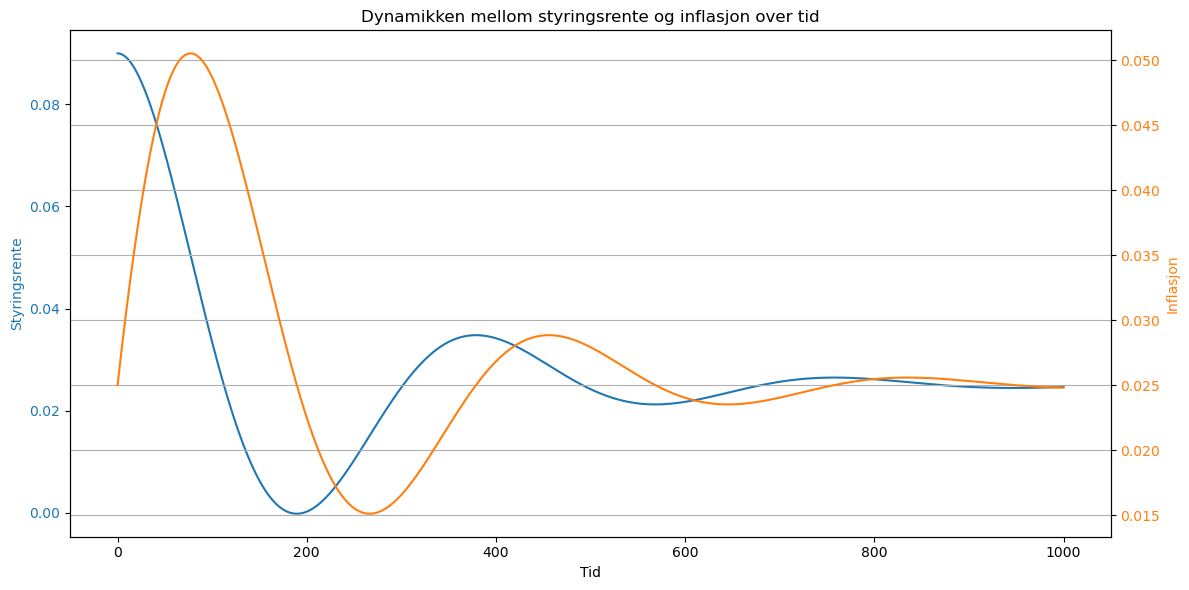

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parametere
gamma = 0.03  # hvor raskt styringsrenten justeres
delta = 0.01  # hvor raskt inflasjonen justeres
i_target = 0.025  # inflasjonsmålet

# Differensialligninger
def model(y, t):
    i, r = y
    di_dt = delta * (r - i)
    dr_dt = gamma * (i_target - i) 
    return [di_dt, dr_dt]

# Initialbetingelser
i0 = 0.025  # initial inflasjon
r0 = 0.0457  # initial styringsrente
y0 = [i0, r0]

# Tidsintervaller
t = np.linspace(0, 1000, 1000)

# Løse ODE-systemet
solution = odeint(model, y0, t)

# Opprette figur og akser
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotte styringsrente
color = 'tab:blue'
ax1.set_xlabel('Tid')
ax1.set_ylabel('Styringsrente', color=color)
ax1.plot(t, solution[:, 1], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Opprette en annen y-akse for inflasjon
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Inflasjon', color=color)
ax2.plot(t, solution[:, 0], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Tittel og grid
plt.title('Dynamikken mellom styringsrente og inflasjon over tid')
fig.tight_layout()
plt.grid(True)
plt.show()